# Figure 9 (Upper panel)

In [1]:
import numpy as np
from copy import deepcopy
from astropy.io import fits
from astropy.table import Table, vstack
import astropy.io.ascii as asci
import astropy.constants as const
from astropy.coordinates import SkyCoord


import matplotlib
import matplotlib.pyplot as plt
fs= 10
matplotlib.rcParams['font.size']=fs

In [2]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)
t0 = 59012
z = 0.1353
D_pc = cosmo.luminosity_distance([z])[0].value * 1e+6 # in pc
DA_pc = cosmo.angular_diameter_distance([z])[0].value * 1e+6
D_cm = D_pc * const.pc.cgs.value
DA_cm = DA_pc * const.pc.cgs.value

import sys
sys.path.insert(1, "/Users/yuhanyao/Dropbox/Projects/AT2020mrf/code//")
from helper.specread import starlinelist, pblines

In [3]:
def bin_spec(v4, y4, binning = 1):
    if binning != 1:
        yy6 = deepcopy(y4)
        vv6 = deepcopy(v4)
        rest = len(yy6)%binning
        if rest!=0:
            vv6 = vv6[:(-1)*rest]
            yy6 = yy6[:(-1)*rest]
        nnew = int(len(yy6) / binning)
        yy6_new = yy6.reshape(nnew, binning)
        yy6_new = np.sum(yy6_new, axis=1)
        y4 = yy6_new / binning
        vv6_new = vv6.reshape(nnew, binning)
        vv6_new = np.sum(vv6_new, axis=1)
        v4 = vv6_new / binning
    yy4 = np.repeat(y4, 2, axis=0)
    v4diff = np.diff(v4)
    v4diff_left = np.hstack([v4diff[0], v4diff])
    v4diff_right = np.hstack([v4diff, v4diff[-1]])
    vv4 = np.repeat(v4, 2, axis=0)
    vv4[::2] -= v4diff_left/2
    vv4[1::2] += v4diff_right/2
    return vv4, yy4

In [4]:
yaolist = starlinelist(z=0)
H_list = yaolist['H_list']
CaII_list = yaolist['CaII_list']
OII_list = yaolist['OII_list']
SII_list = yaolist['SII_list']
ArIII_list = yaolist['ArIII_list']
NeIII_list = yaolist['NeIII_list']
Mgb_list = yaolist['Mgb_list']

NaI_list = yaolist["NaI_list"]
HeI_list = yaolist['HeI_list']
HeII_list = yaolist['HeII_list']
OIII_list = yaolist['OIII_list']
OI_list = yaolist['OI_list']
SIII_list = yaolist['SIII_list']
NII_list = yaolist['NII_list']
CaII_list = yaolist['CaII_list']
MgII_list = yaolist["MgII_list"]
KI_list = yaolist["KI_list"]

In [5]:
def custom_ax(ax):
    ax.tick_params(which = 'major', length = 4, top=False, direction = "in", right = True)
    ax.tick_params(which = 'minor', length = 2, top=False, direction = "in", right = True)
    ax.xaxis.set_major_locator(plt.MultipleLocator(500))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
    ax.yaxis.set_major_locator(plt.MultipleLocator(2))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
    
    ax.set_xlabel('Rest-frame Wavelength ('+r'$\rm \AA$'+')')
    #ax.set_ylabel("Observed "+r'$f_{\lambda}$'+" ("+r"$10^{-18}\,$"+"erg"+r"$\,{\rm s^{-1}\,cm^{-2}\,\AA^{-1}}$"+")")
    ax.set_ylabel(r'$f_{\nu}$'+" ("+r"$\mu$"+"Jy)")

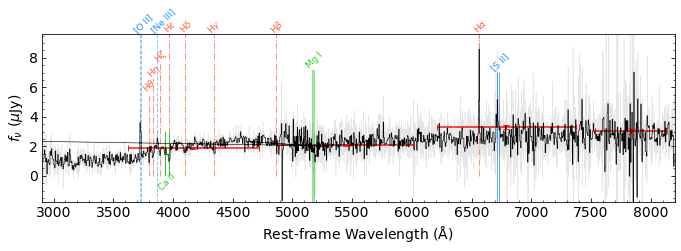

In [6]:
    specdir = '../data/data_20mrf/host/lris/'
    sp = asci.read(specdir+"goodspec.dat")
    
    df = asci.read("../data/data_20mrf/host/hsc_simple_spplot.dat")
    
    
    plot_host_phot = True

    plt.figure(figsize = (9.5, 3.5))
    ax = plt.subplot(111)
    lw = 0.6
    ymin = -1.8
    ymax = 9.6
    xmin = 2900
    xmax = 8200
    
    wave = sp["wave"]/(1+z)
    flux = sp["fnu0_uJy"]
    ax.plot(wave, flux, linewidth = lw, color = "k", alpha = 0.1)
    
    ww0, ff0 = bin_spec(wave, flux, binning = 3)
    ww2, ff2 = bin_spec(wave, flux, binning = 5)
    wv_divide = 5300
    ix0 = ww0 < wv_divide
    ix2 = ww2 > wv_divide
    ww1 = np.hstack([ww0[ix0], ww2[ix2]])
    ff1 = np.hstack([ff0[ix0], ff2[ix2]])
    ax.plot(ww1, ff1, linewidth = lw, color = "k", alpha = 1)
    custom_ax(ax)
    
    # hydrogen
    color = "tomato"
    pblines(ax, H_list[-5:], tb=0, tu=ymax, ls = "-.", alpha = 0.7, color = color)
    ax.text(6563-70, ymax*1.01, "H"+r"$\alpha$", color = color, fontsize = fs-1, rotation = 45)
    ax.text(4861-70, ymax*1.01, "H"+r"$\beta$", color = color, fontsize = fs-1, rotation = 45)
    ax.text(4340-70, ymax*1.01, "H"+r"$\gamma$", color = color, fontsize = fs-1, rotation = 45)
    ax.text(4102-70, ymax*1.01, "H"+r"$\delta$", color = color, fontsize = fs-1, rotation = 45)
    ax.text(3970-70, ymax*1.01, "H"+r"$\epsilon$", color = color, fontsize = fs-1, rotation = 45)
    pblines(ax, H_list[-6:-5], tb=0, tu=ymax-2, ls = "-.", alpha = 0.7, color = color)
    ax.text(3889-70, ymax*1.01-2, "H"+r"$\zeta$", color = color, fontsize = fs-1, rotation = 45)
    pblines(ax, H_list[-7:-6], tb=0, tu=ymax-3, ls = "-.", alpha = 0.7, color = color)
    ax.text(3835-70, ymax*1.01-3, "H"+r"$\eta$", color = color, fontsize = fs-1, rotation = 45)
    pblines(ax, H_list[-8:-7], tb=0, tu=ymax-4, ls = "-.", alpha = 0.7, color = color)
    ax.text(3798-70, ymax*1.01-4, "H"+r"$\theta$", color = color, fontsize = fs-1, rotation = 45)
    
    # O II
    color = "dodgerblue"
    pblines(ax, OII_list, tb=ymin, tu=ymax, ls = "--", alpha = 0.5, color = color)
    ax.text(3728-70, ymax*1.01, "[O II]", color = color, rotation = 45, fontsize = fs-1)
    # Ne III
    pblines(ax, NeIII_list, tb=ymin, tu=ymax, ls = "--", alpha = 0.5, color = color)
    ax.text(3869-70, ymax*1.01, "[Ne III]", color = color, rotation = 45, fontsize = fs-1)
    # S II
    pblines(ax, SII_list, tb=ymin, tu=7, color = color, ls="-", alpha = 0.7)
    ax.text(6720-70, 7.1, "[S II]", color = color, fontsize = fs-1, rotation = 45, zorder = 50)
    
    
    # Mg I b
    color = "limegreen"
    pblines(ax, Mgb_list, tb=ymin, tu=7.2, color = color, ls="-", alpha = 0.5)
    ax.text(5173-70, 7.3, "Mg I", color = color, fontsize = fs-1, rotation = 45)
    # Ca II
    pblines(ax, CaII_list[:-3], tb=0.08, tu=3, color = color,  ls="-")
    ax.text(3968-100, -1, "Ca II", color = color, fontsize = fs-1, rotation = 45, zorder = 50)
    
    if plot_host_phot:
        for i in range(len(df)):
            ff = df["f0_uJy"][i]
            eff = df["ef_uJy"][i]
            ww1 = df["wv_left"][i]/(1+z)
            ww2 = df["wv_right"][i]/(1+z)
            eww = (ww2-ww1)/2
            ww0 = ww1/2 + ww2/2
            ax.errorbar(ww0, ff, xerr = eww, yerr = eff, color = "red", alpha = 0.9, capsize = 3)
    
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    plt.tight_layout(rect = (-0.01, -0.03, 1.01, 1.03))